In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

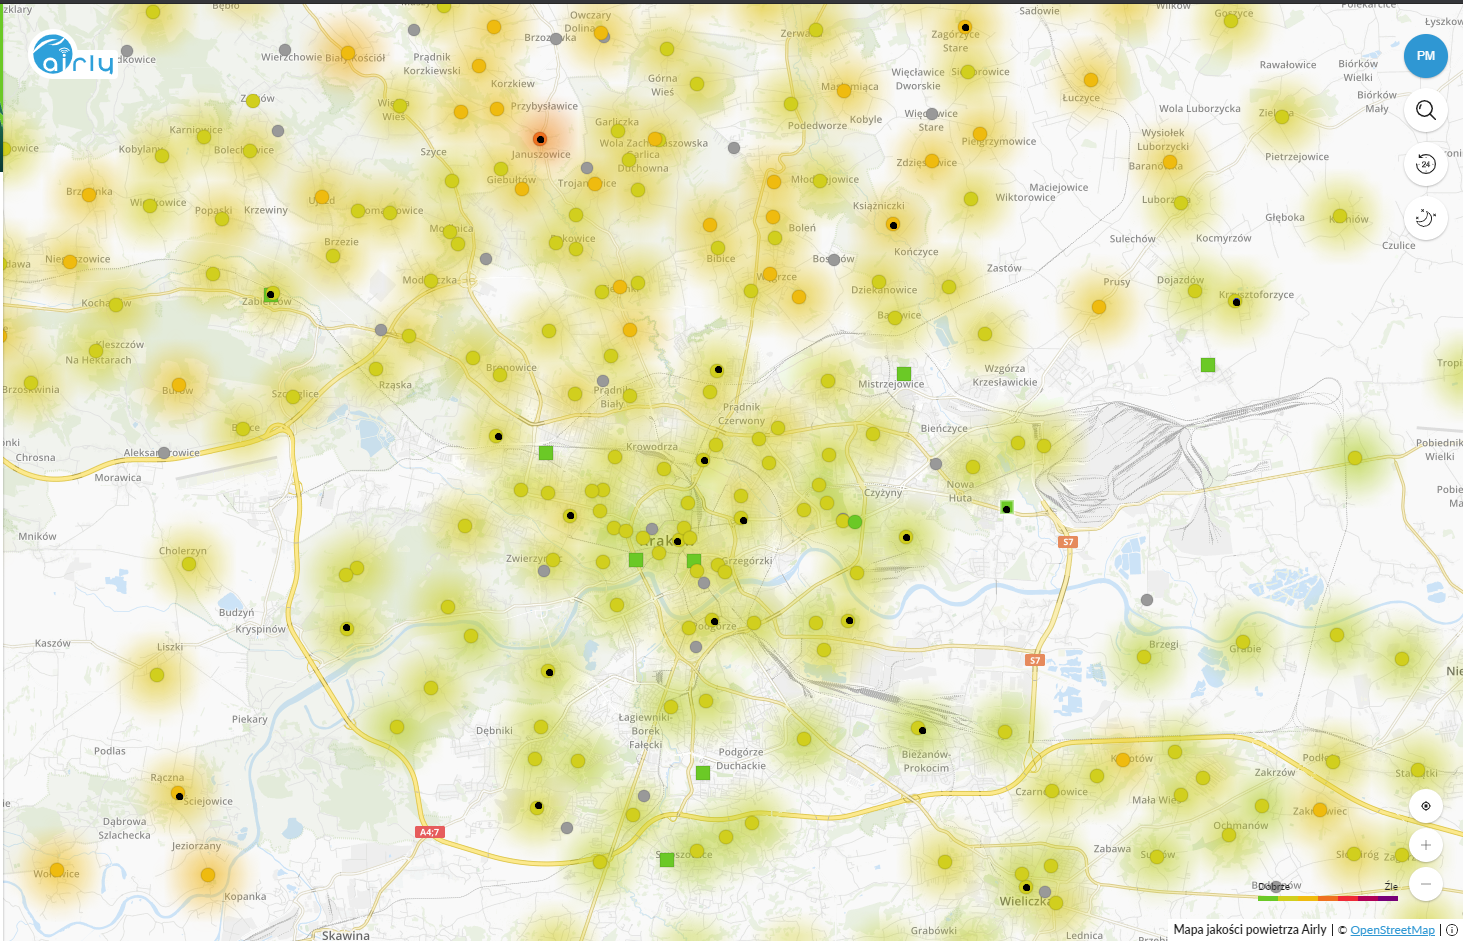

In [125]:
from IPython.display import Image
Image(filename='mapa.png') 

## Wczytanie danych z pliku csv

In [114]:
df = pd.read_csv('./measurements.csv', header = 0).iloc[:, 1:] # usuń kolumnę id
df = df.drop(columns=['indexLevel'])

In [115]:
df['fromDataTime'] = df['fromDataTime'].apply(lambda x: pd.to_datetime(x))
df['tillDateTime'] = df['tillDateTime'].apply(lambda x: pd.to_datetime(x))

df

installationId        fromDataTime        tillDateTime   PM1   PM25  \
0                 19 2020-03-06 15:00:00 2020-03-06 16:00:00   NaN   9.18   
1                 19 2020-03-06 16:00:00 2020-03-06 17:00:00   NaN  11.90   
2                 19 2020-03-06 17:00:00 2020-03-06 18:00:00   NaN  14.68   
3                 19 2020-03-06 18:00:00 2020-03-06 19:00:00   NaN  13.06   
4                 19 2020-03-06 19:00:00 2020-03-06 20:00:00   NaN  11.14   
...              ...                 ...                 ...   ...    ...   
4308           11489 2020-03-15 08:00:00 2020-03-15 09:00:00  6.38   9.34   
4309           11489 2020-03-15 09:00:00 2020-03-15 10:00:00  3.89   5.96   
4310           11489 2020-03-15 10:00:00 2020-03-15 11:00:00  4.19   6.04   
4311           11489 2020-03-15 11:00:00 2020-03-15 12:00:00  3.81   5.50   
4312           11489 2020-03-15 12:00:00 2020-03-15 13:00:00  3.04   4.36   

       PM10  PRESSURE  HUMIDITY  TEMPERATURE  indexValue    NO2      CO  
0     31.15       NaN       NaN          NaN       31.15  65.31  440.75  
1     35.42       NaN       NaN          NaN       35.42  68.93  464.01  
2     38.20       NaN       NaN          NaN       38.20  70.74  528.15  
3     32.74       NaN       NaN          NaN       32.74  61.21  478.53  
4     24.30       NaN       NaN          NaN       24.30  34.67  392.50  
...     ...       ...       ...          ...         ...    ...     ...  
4308  17.70   1030.30     52.27         0.71       17.70    NaN     NaN  
4309  11.22   1030.05     40.86         3.08       11.22    NaN     NaN  
4310  11.56   1029.64     35.81         4.84       11.56    NaN     NaN  
4311  10.58   1029.13     31.14         6.14       10.58    NaN     NaN  
4312   8.44   1028.49     27.76         7.45        8.44    NaN     NaN  

[4313 rows x 12 columns]

In [116]:
installationd_id = df['installationId'].unique()
measurements_by_installation_id = dict()
for id in installationd_id:
    measurements_by_installation_id[id] = df.loc[df['installationId'] == id]

In [117]:
import matplotlib.dates as mdates

def plotAllData(column: str):
    days = mdates.DayLocator()
    days_fmt = mdates.DateFormatter('%d')

    fig, ax = plt.subplots()

    fig.set_figheight(15)
    fig.set_figwidth(15)
    for id, measurements in measurements_by_installation_id.items():
        ax.plot(measurements.fromDataTime, measurements[column], label=id)

    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(days_fmt)
    ax.grid(True)

    plt.xlabel('Day')
    plt.ylabel(column)
    plt.legend()

    plt.show()

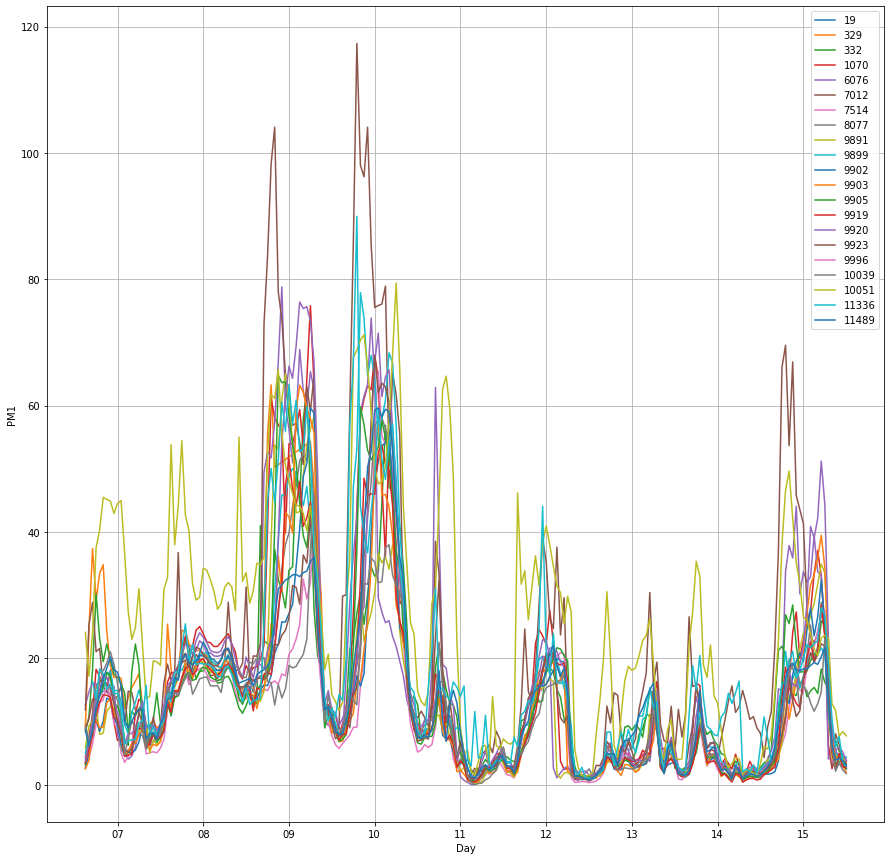

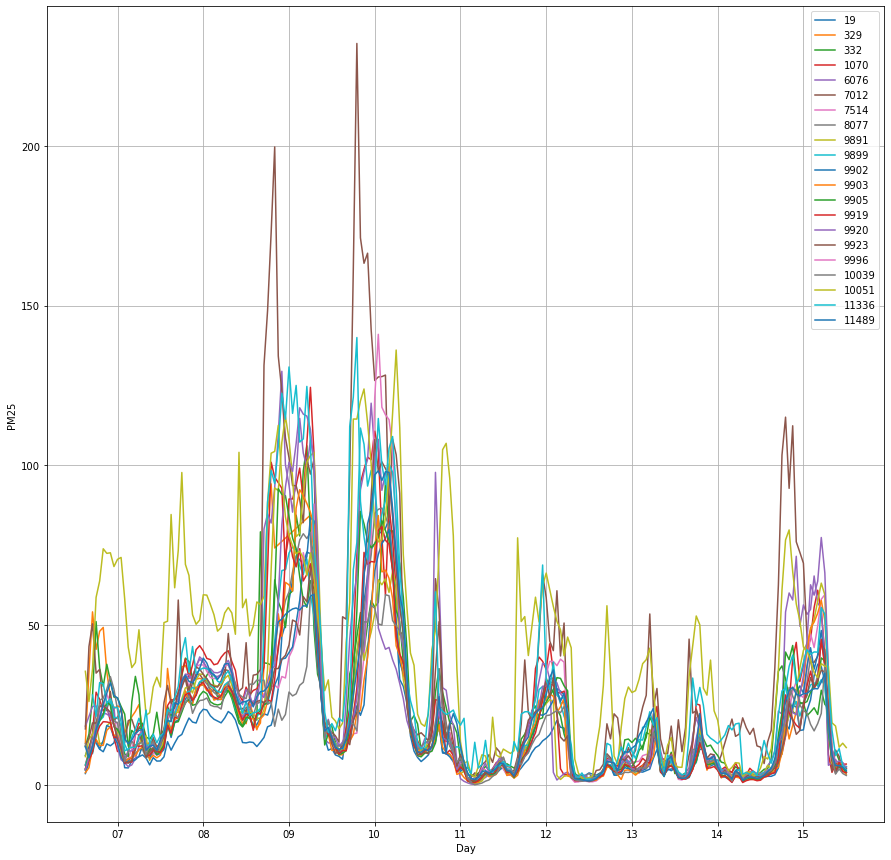

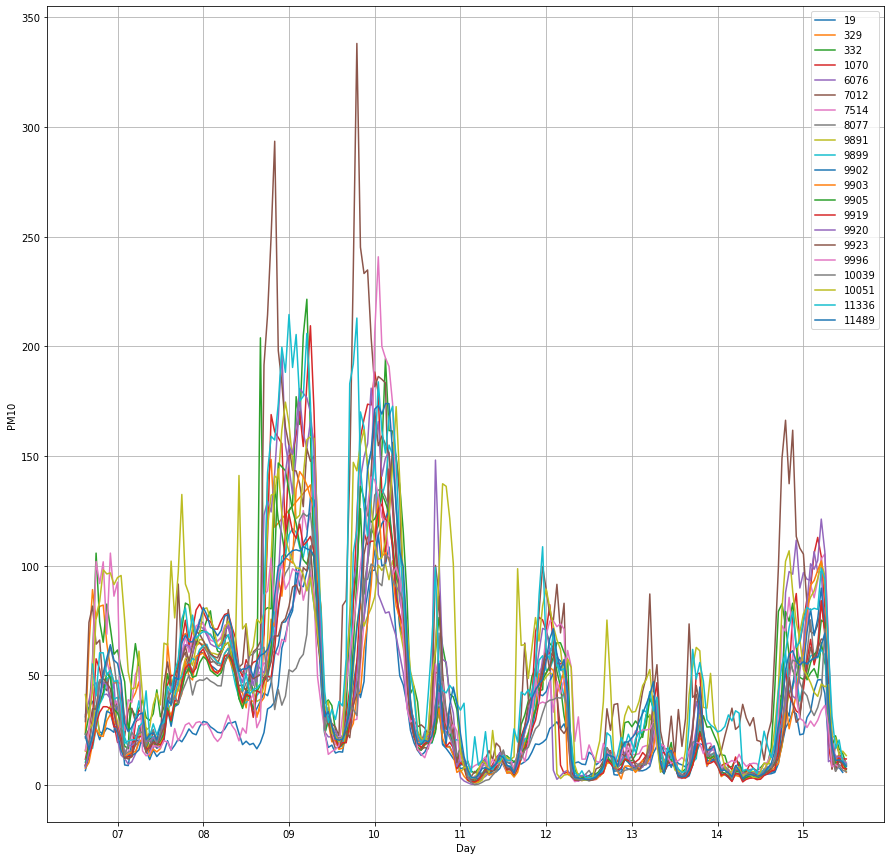

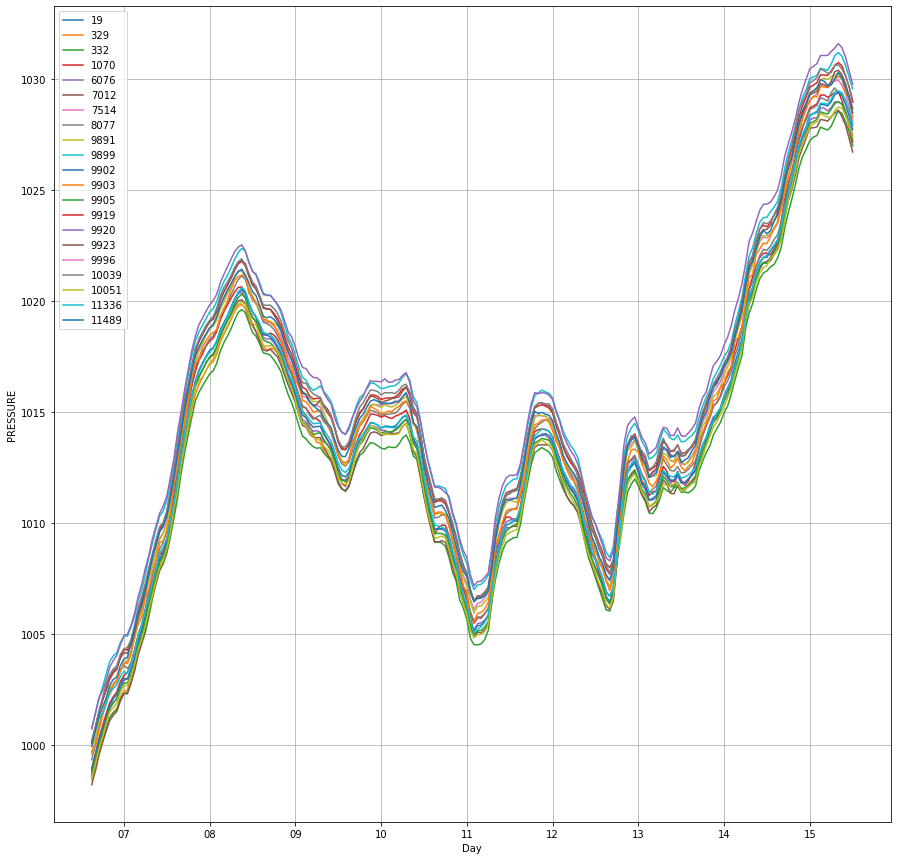

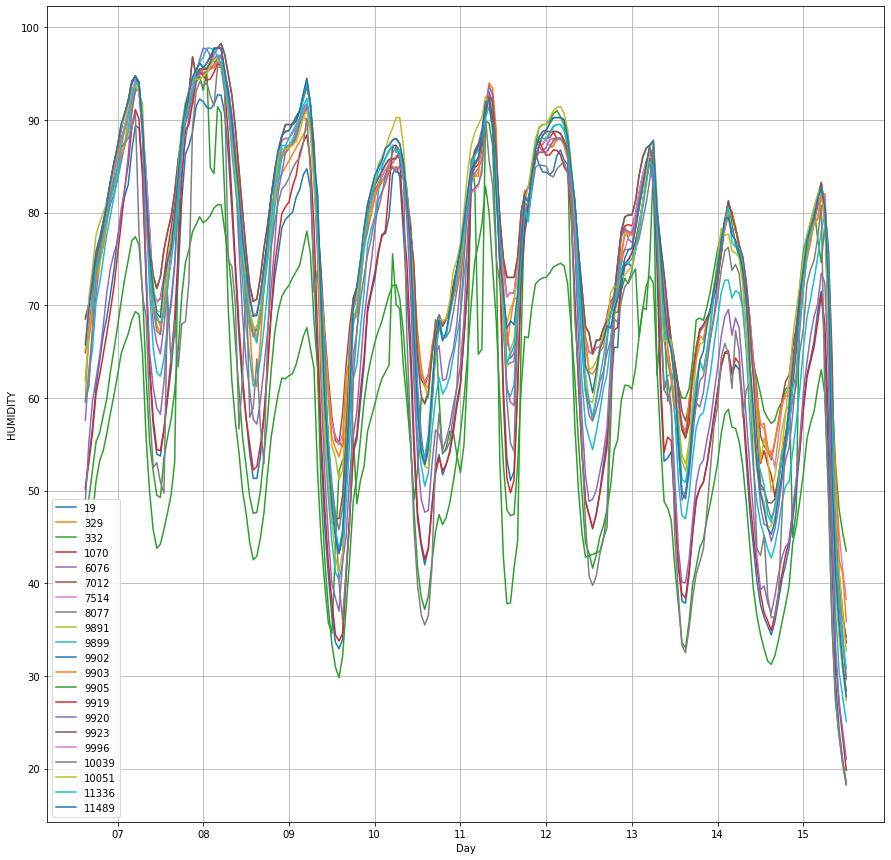

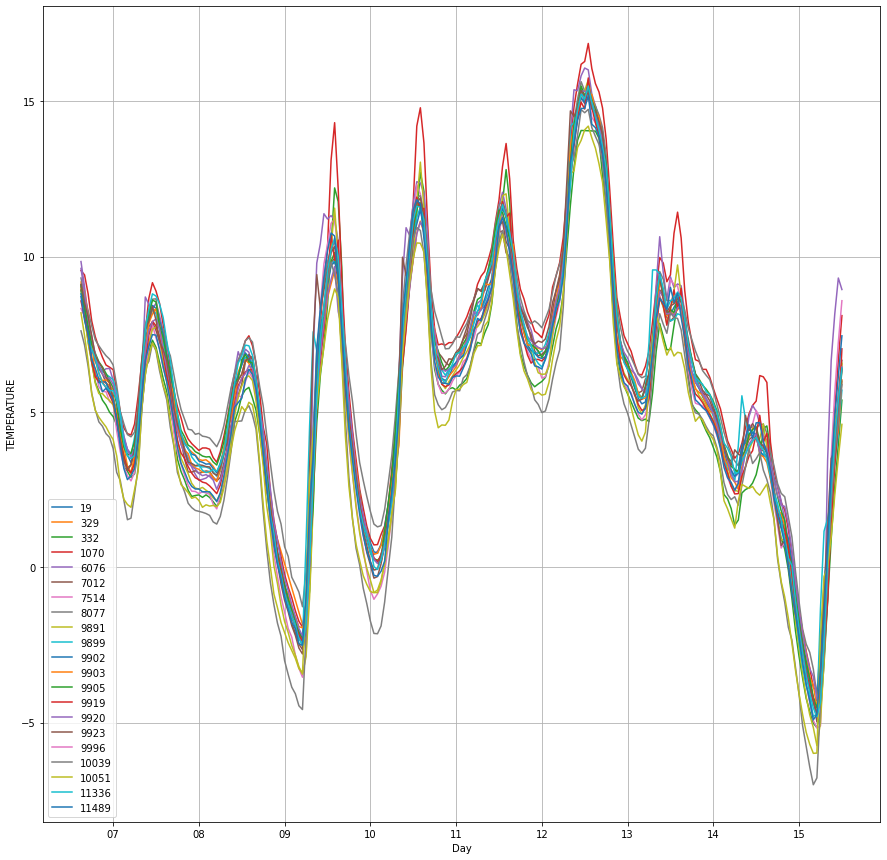

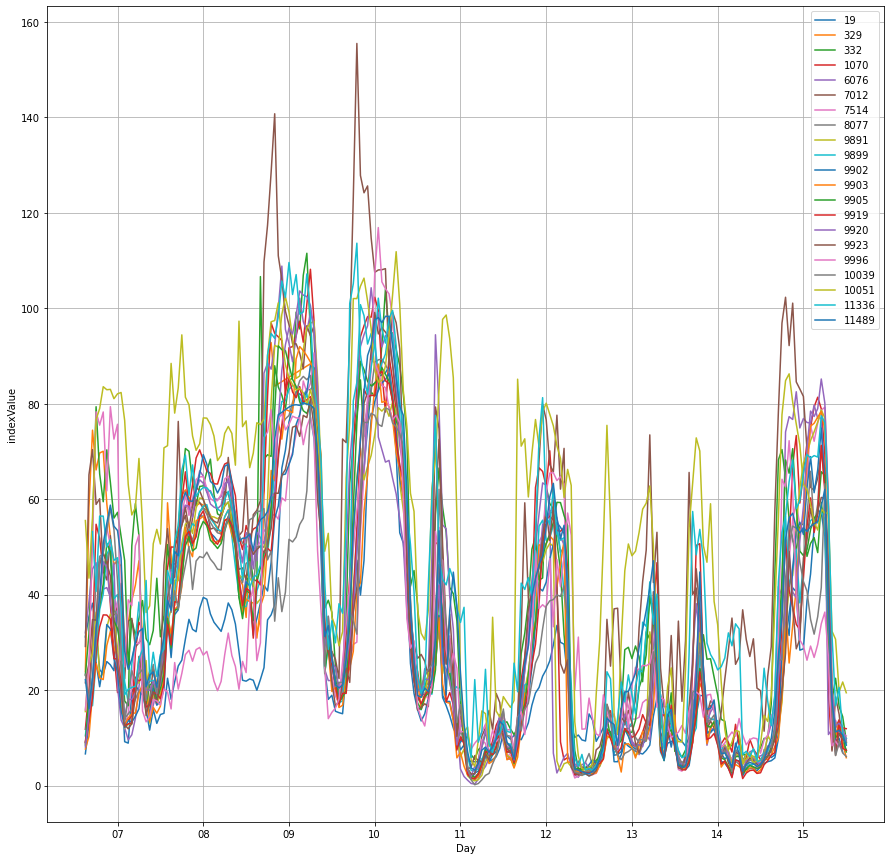

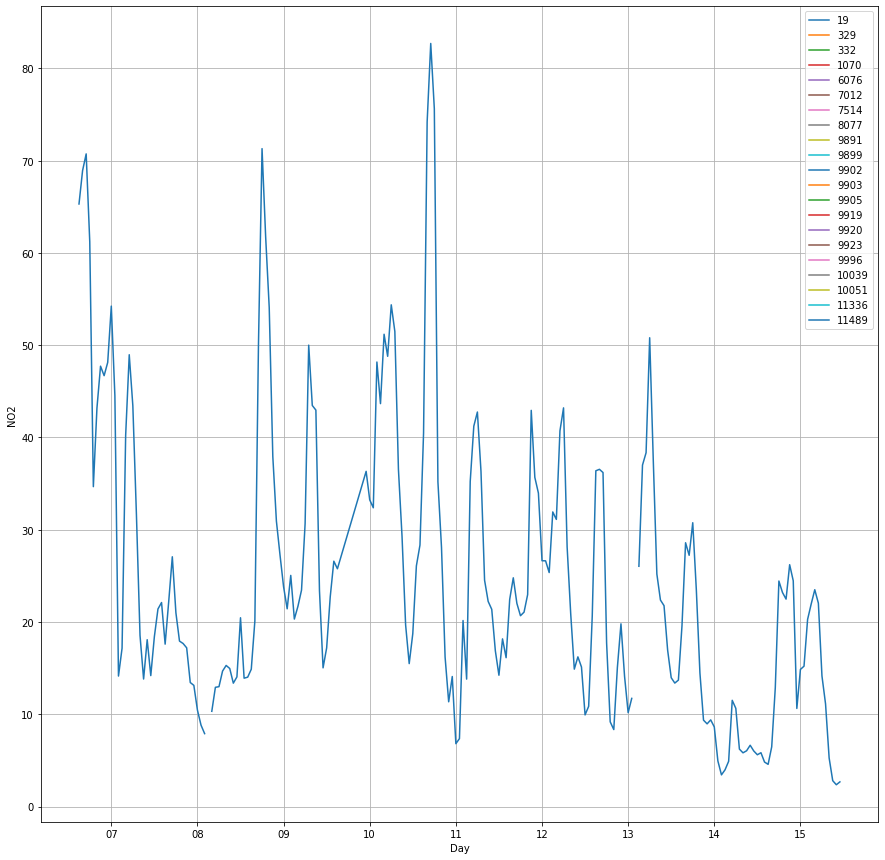

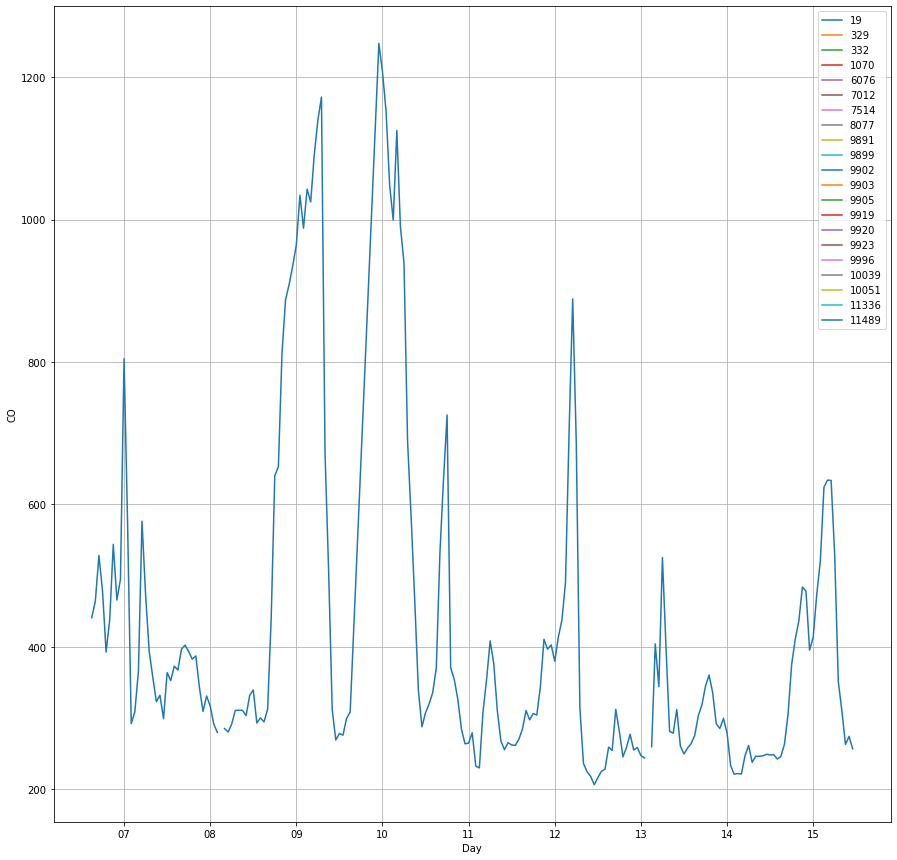

In [118]:
columns_to_plot = np.delete(df.columns.values, (0, 1, 2))
for col in columns_to_plot:
    plotAllData(col)

## Data processing

In [124]:
from sklearn import preprocessing

data = df.iloc[:, 3:]
data.corr()

PM1      PM25      PM10  PRESSURE  HUMIDITY  TEMPERATURE  \
PM1          1.000000  0.991222  0.974222  0.163793  0.337538    -0.556452   
PM25         0.991222  1.000000  0.984006  0.170270  0.346641    -0.558160   
PM10         0.974222  0.984006  1.000000  0.198015  0.361387    -0.586021   
PRESSURE     0.163793  0.170270  0.198015  1.000000 -0.167751    -0.582478   
HUMIDITY     0.337538  0.346641  0.361387 -0.167751  1.000000    -0.269750   
TEMPERATURE -0.556452 -0.558160 -0.586021 -0.582478 -0.269750     1.000000   
indexValue   0.934717  0.936461  0.959450  0.229815  0.400485    -0.610040   
NO2               NaN  0.283056  0.404130       NaN       NaN          NaN   
CO                NaN  0.908877  0.933367       NaN       NaN          NaN   

             indexValue       NO2        CO  
PM1            0.934717       NaN       NaN  
PM25           0.936461  0.283056  0.908877  
PM10           0.959450  0.404130  0.933367  
PRESSURE       0.229815       NaN       NaN  
HUMIDITY       0.400485       NaN       NaN  
TEMPERATURE   -0.610040       NaN       NaN  
indexValue     1.000000  0.385451  0.908130  
NO2            0.385451  1.000000  0.526412  
CO             0.908130  0.526412  1.000000